__Autor: Pablo Veloz M.__
## Desafío - Análisis lineal discriminante

__Descripción__
- Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
    - `default` : Variable Binaria. Registra si el cliente entró en morosidad o no.
    - `income` : Ingreso promedio declarado por el cliente.
    - `balance` : total del sando en la cuenta de crédito.
    - `student` : Variable binaria. Registra si el cliente es estudiante o no.

__Ejercicio 1: Preparación de ambiente de trabajo__
- Importe los módulos básicos para el análisis de datos.
- Importe las clases LabelEncoder , StandardScaler y LabelBinarizer de preprocessing
- Importe las funciones train_test_split y cross_val_score de model_selection
- Importe la función classification_report de metrics
- Importe las clases LinearDiscriminantAnalysis y QuadraticDiscriminantAnalysis .
- Agregue la base de datos en el ambiente de trabajo.
- Inspeccione la distribución de cada atributo

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
warnings.filterwarnings(action='ignore')

import aux_funciones as auxiliares

__Agregue la base de datos en el ambiente de trabajo.__

In [102]:
df = pd.read_csv('Archivos para desafío(1)/default_credit.csv')
df = df.drop('index', axis = 1)


In [103]:
df.head(5)


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [104]:
df.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

__Inspeccione la distribución de cada atributo__

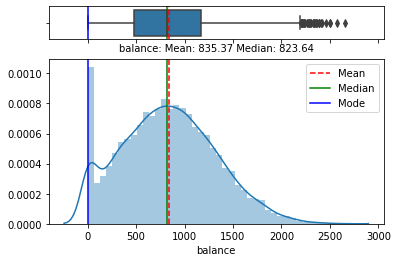

In [105]:
auxiliares.hist_box(df,'balance')

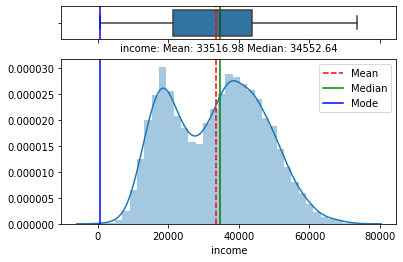

In [106]:
auxiliares.hist_box(df,'income')

- `Balance` se presenta mejor distribución normal en comparación a `income`

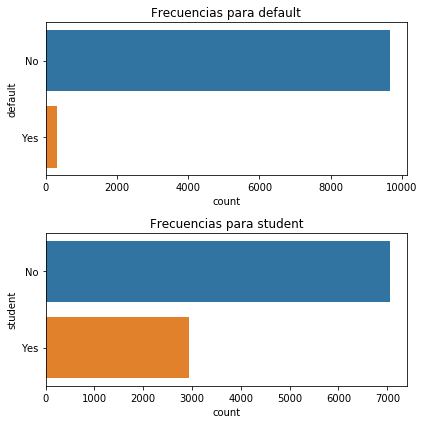

In [107]:
auxiliares.bar_counts(df,['default','student'],(2,1),(6,6))

- `default` presenta un desbalance significativo hacia __No__.
- `student` también presenta desbalance aunque no tan significativo hacia __No__

__Ejercicio 2: Modelo base__
- Recuerde que los modelos de sklearn no soportan datos que no sean numéricos. Transforme los atributos pertinentes con LabelEncoder .
- Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.
- Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiperparámetros.
- Genere métricas de evaluación utilizando classification_report .
- Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

In [108]:
df2=df.copy()

In [109]:
df2['default'] = LabelEncoder().fit_transform(df['default'])
df2['student'] = LabelEncoder().fit_transform(df['student'])

In [110]:
df2.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


- Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.

In [111]:
y_vec=df2['default']
X_mat=df2.drop('default',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.33,random_state=1)

- Escalando

In [112]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

- Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiperparámetros.

In [113]:
lda_model = LDA()
lda_model_entrenado = lda_model.fit(X_train, y_train)

In [114]:
y_hat = lda_model_entrenado.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3200
           1       0.79      0.30      0.43       100

    accuracy                           0.98      3300
   macro avg       0.88      0.65      0.71      3300
weighted avg       0.97      0.98      0.97      3300



- __`default`__:
    - La clase 0 al tener alta precision y recall, significa que los morosos se clasificaron a su totalidad como morosos
    - La clase 1 al tener alta precision u bajo recall, significa que los morosos se clasificaron como no morosos.

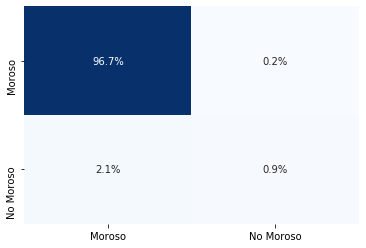

In [115]:
auxiliares.matriz_confusion(y_test,y_hat,["Moroso","No Moroso"])

- El modelo de discriminante lineal clasifica con excelente resultado a aquellos que son morosos, en contraste a los no moroso 

__Ejercicio 3: Refactorización 1 - información a priori__
- Dado que trabajamos con modelos generativos, podemos incluír información exógena. Para este caso agregaremos dos distribuciones:
- Asumamos que hay un 50/50 de morosos y no morosos.
- Asumamos que hay un 60/40 de morosos y no morosos.
- Por cada modelo, reporte las métricas de clasificación.

### __Modelo priors=.5/.5__

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3200
           1       0.15      0.90      0.26       100

    accuracy                           0.84      3300
   macro avg       0.57      0.87      0.58      3300
weighted avg       0.97      0.84      0.89      3300



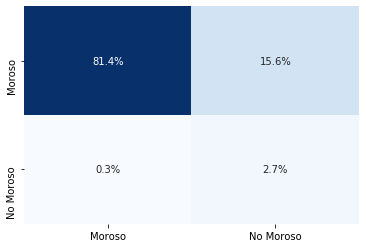

In [116]:
lda_model2 = LDA(priors=[.5,.5])
lda_model2_entrenado = lda_model2.fit(X_train, y_train)
y_hat = lda_model2_entrenado.predict(X_test)
print(classification_report(y_test, y_hat))
auxiliares.matriz_confusion(y_test,y_hat,["Moroso","No Moroso"])

### __Modelo priors=.6/.4__

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3200
           1       0.18      0.86      0.30       100

    accuracy                           0.88      3300
   macro avg       0.59      0.87      0.62      3300
weighted avg       0.97      0.88      0.91      3300



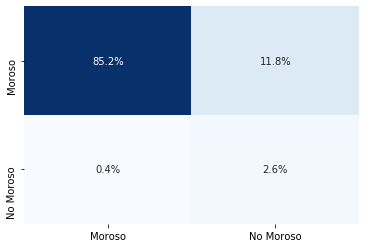

In [117]:
lda_model3 = LDA(priors=[.6,.4])
lda_model3_entrenado = lda_model3.fit(X_train, y_train)
y_hat = lda_model3_entrenado.predict(X_test)
print(classification_report(y_test, y_hat))
auxiliares.matriz_confusion(y_test,y_hat,["Moroso","No Moroso"])

__Ejercicio 4: Refactorización 2 - oversampling__

Digresión: Synthetic Over(Under)Sampling
- Por lo general podemos intentar aliviar el problema del desbalance de clases mediante la ponderación dentro del algoritmo. Otra alternativa es el muestreo con reemplazo dentro de los conjuntos de entrenamiento. Estos métodos clásicos se conocen como Oversampling cuando repetimos registros aleatorios de la clase minoritaria, y Undersampling cuando eliminamos aleatoriamente registros de la clase mayoritaria.
- Un contratiempo de estos métodos clásicos es que pueden replicar información sesgada que afecte el desempeño de generalización del modelo. Si los datos son malos, estaremos replicando estas fallas.
- Otra solución es generar ejemplos de entrenamiento sintéticos mediante el entrenamiento de ejemplos de la clase minoritaria. A grandes rasgos la solución funciona de la siguiente forma: 
    - En función a un subconjunto de datos correspondientes a la case minoritaria, entrenamos algún modelo no supervisado o generativo como Naive Bayes, KMeans o KNearestNeighbors para generar representaciones sintéticas de los datos en el espacio de atributos de la clase específica mediante
        - $\mathbf{x}_{\textsf{nuevo-ejemplo}} = \mathbf{x}{i} + \lambda (\mathbf{x}{zi} - \mathbf{x}{i})$ donde 
          $\mathbf{x}_{zi}$ 
es un ejemplo de entrenamiento de la clase minoritaria y $\lambda$ es un parámetro de interpolación aleatorio $\lambda \sim \textsf{Uniforme}(0, 1)$.
- Uno de los problemas más graves de esta base de datos, es el fuerte desbalance entre clases. Ahora generaremos observaciones sintéticas mediante SMOTE (Synthetic Minority Oversampling Technique). Para ello, debemos agregar el paquete a nuestro ambiente virtual. En nuestro terminal agregamos conda install -c conda-forge imbalanced-learn . Incorpore SMOTE en el ambiente de trabajo con la siguiente sintáxis from imblearn.over_sampling import SMOTE .
- Para implementar oversampling, debemos generar nuevos objetos que representan nuestra muestra de entrenamiento incrementada artificialmente. Para ello implemente la siguiente sintáxis:

### __Modelo SMOTE__

In [118]:
y_vec=df2['default']
X_mat=df2.drop('default',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.33,random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from imblearn.over_sampling import SMOTE
# Instanciamos la clase
oversampler = SMOTE(random_state=11238, ratio='minority')
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3200
           1       0.15      0.90      0.26       100

    accuracy                           0.84      3300
   macro avg       0.57      0.87      0.58      3300
weighted avg       0.97      0.84      0.89      3300



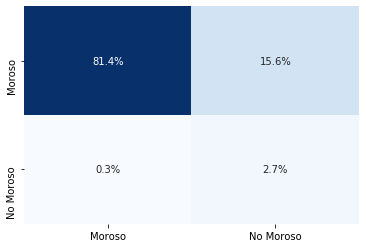

In [119]:
lda_model4 = LDA()
lda_model4_entrenado = lda_model4.fit(X_train_oversamp, y_train_oversamp)
y_hat = lda_model4_entrenado.predict(X_test)
print(classification_report(y_test, y_hat))
auxiliares.matriz_confusion(y_test,y_hat,["Moroso","No Moroso"])

__Ejercicio 5: Refactorización 3 - QDA__
- Por último, implemente un modelo QuadraticDiscriminantAnalysis con los datos aumentados artificialmente. 
- Genere las métricas de desempeño.
- Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.

### __Modeo QDA__

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3200
           1       0.17      0.89      0.28       100

    accuracy                           0.86      3300
   macro avg       0.58      0.88      0.60      3300
weighted avg       0.97      0.86      0.90      3300



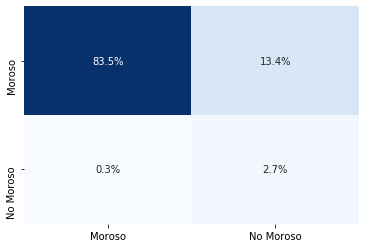

In [120]:
lda_model5 = QDA()
lda_model5_entrenado = lda_model5.fit(X_train_oversamp, y_train_oversamp)
y_hat = lda_model5_entrenado.predict(X_test)
print(classification_report(y_test, y_hat))
auxiliares.matriz_confusion(y_test,y_hat,["Moroso","No Moroso"])

- El puntaje F1 podría ser un mejor medida para usar si necesitamos buscar un equilibrio entre Precisión y recall.
    - Modelo 1 base LDA: 0.43
    - Modelo 2 LDA: 0.26
    - Modelo 3 LDA: 0.30
    - Modelo 4 LDA: 0.26
    - Modelo 5 QDA: 0.28
        - El mejor desempeño lo realiza el `modelo 1 base` 
- Todos los modelos presentan desbalance en los resultados entre las clases 0 y 1 (Moroso - No moroso) 
- Todos los modelos señalan mejores desempeños para el caso Morosos